<a href="https://colab.research.google.com/github/somustafa/asoiu-skillcamp/blob/main/WineQuality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Cleaning & Handling missing values (Lala)

In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv("/content/WineQuality.csv")

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop("quality", axis=1)
y = df["quality"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1359, 11)
X_test shape: (340, 11)
y_train shape: (1359,)
y_test shape: (340,)


In [ ]:
df.duplicated().sum()

np.int64(240)

In [ ]:
df.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


In [ ]:
df=df.drop_duplicates()
df.shape

(1459, 12)

In [ ]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,8.322581,0.528159,0.272738,2.536439,0.088169,16.093888,47.302253,0.996712,3.310052,0.657568,10.430073,5.626463
std,1.720042,0.182356,0.194563,1.344330,0.049037,10.483027,33.182546,0.001870,0.154904,0.170222,1.081437,0.824518
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.100000,1.900000,0.069000,7.921819,22.000000,0.995580,3.210000,0.550000,9.500000,5.000000
50%,7.917558,0.520000,0.260000,2.200000,0.079000,14.000000,39.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.092000,22.000000,64.000000,0.997855,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
X = df.drop("quality", axis=1)
y = df["quality"]

In [ ]:
df['quality'] = df['quality'].apply(lambda x: 1 if x >= 7 else 0)

# Outlier detection and treatment (Sona)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
X_train_vis = pd.DataFrame(X_train, columns=df.drop("quality", axis=1).columns)


Q1 = X_train_vis.quantile(0.25)
Q3 = X_train_vis.quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

In [ ]:
outlier_count = ((X_train < lower) | (X_train > upper)).sum()
print(outlier_count)

outlier_rows = ((X_train < lower) | (X_train > upper)).any(axis=1)
print("Number of rows with outliers:", outlier_rows.sum())

fixed acidity            46
volatile acidity         16
citric acid               1
residual sugar          144
chlorides               100
free sulfur dioxide      19
total sulfur dioxide     50
density                  37
pH                       26
sulphates                48
alcohol                  13
dtype: int64
Number of rows with outliers: 365


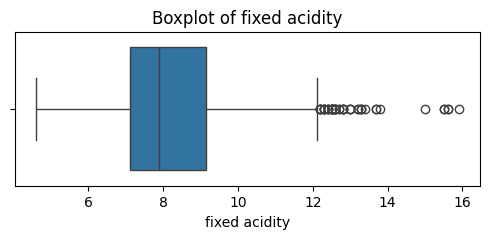

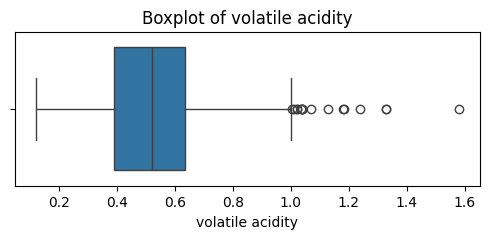

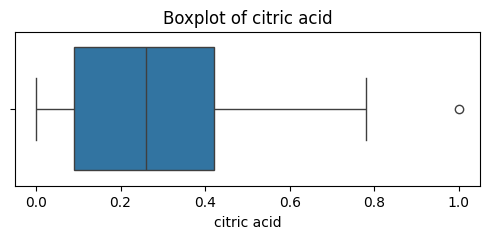

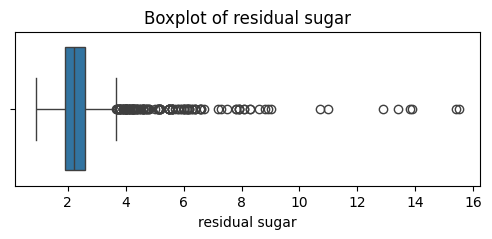

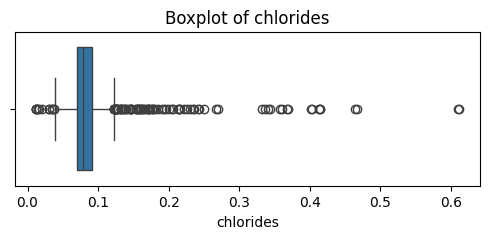

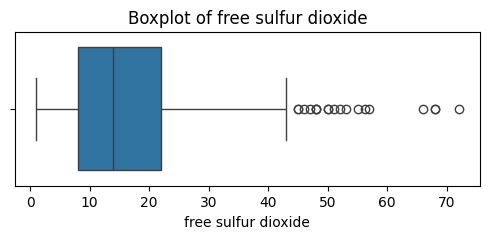

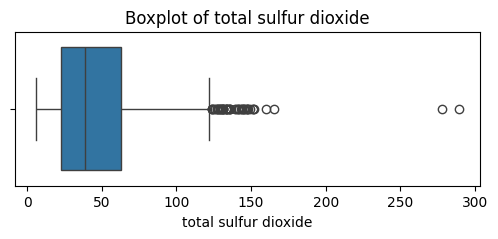

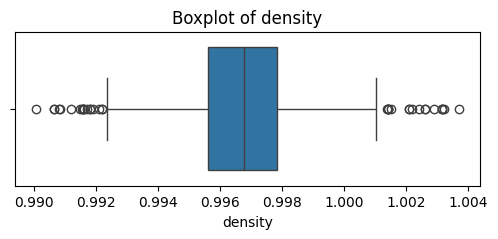

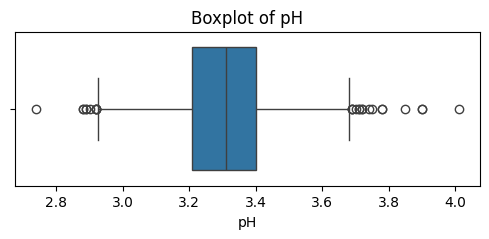

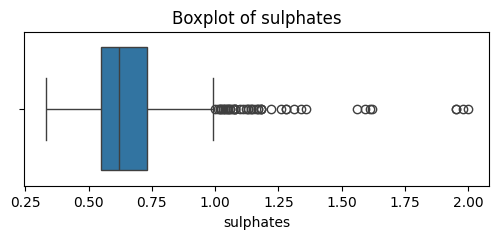

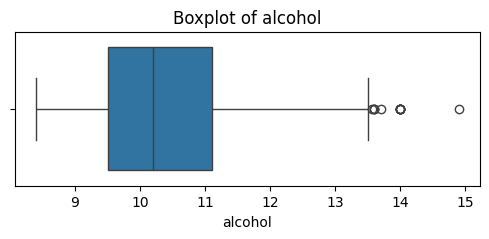

In [ ]:
# Boxplot
def plot_boxplots(df):
    """
    Verilən DataFrame-də bütün sütunlar üçün boxplot çəkir
    """
    for col in df.columns:
        plt.figure(figsize=(6,2))
        sns.boxplot(x=df[col])
        plt.title(f"Boxplot of {col}")
        plt.show()
plot_boxplots(X_train)

In [ ]:
def removal_box_plot(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    # Outlier-ləri çıxarır
    df_no_outliers = df[(df[column] >= lower) & (df[column] <= upper)]

    # Boxplot vizual
    sns.boxplot(df_no_outliers[column])
    plt.title(f'Box Plot without Outliers of {column}')
    plt.show()

    return df_no_outliers

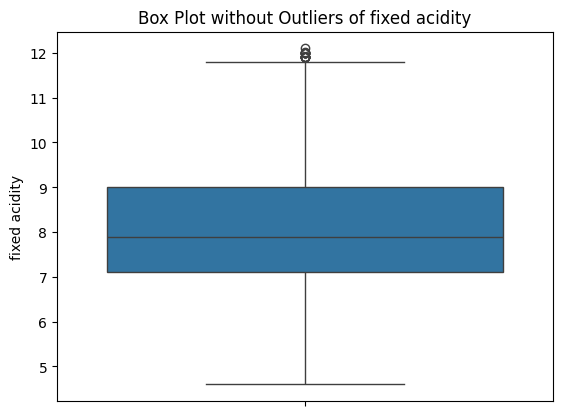

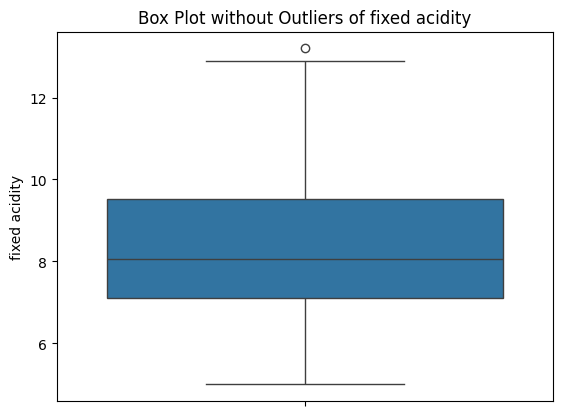

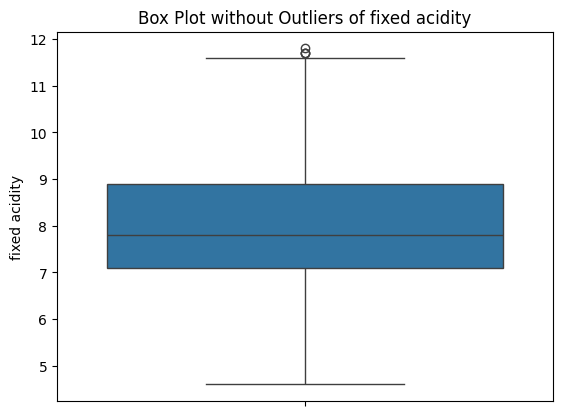

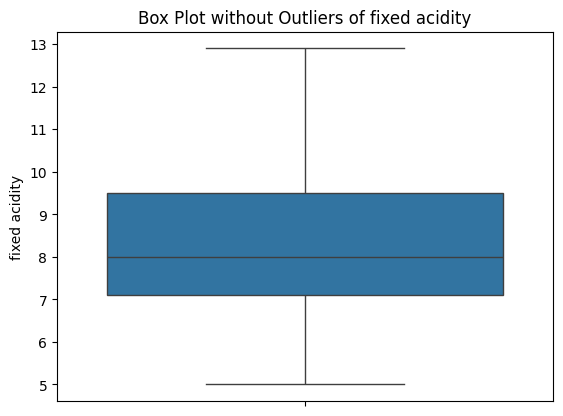

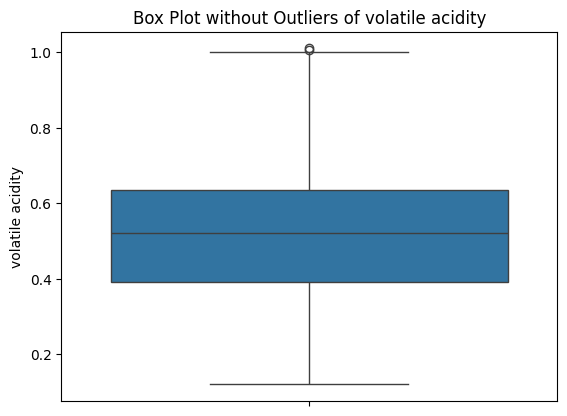

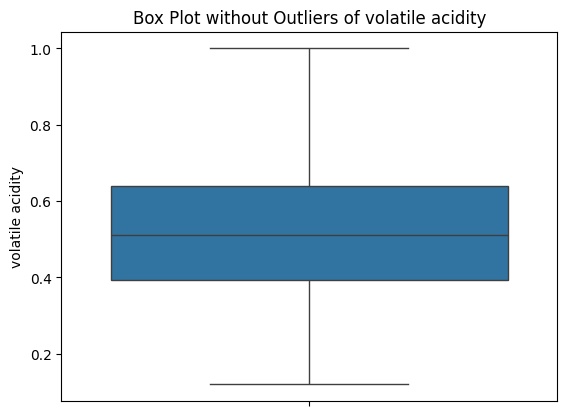

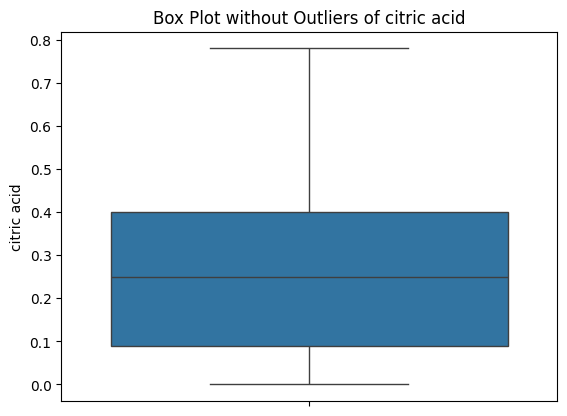

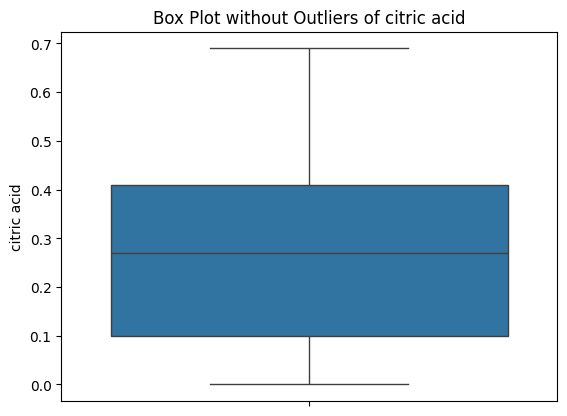

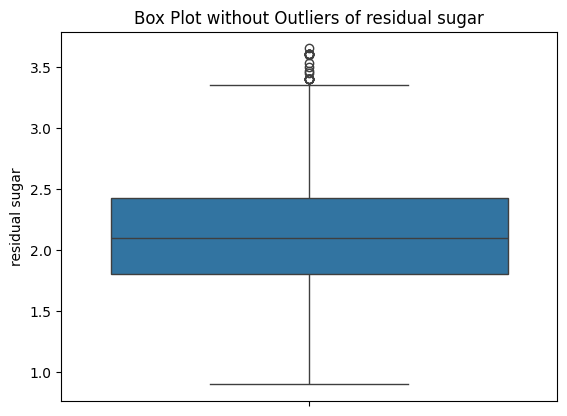

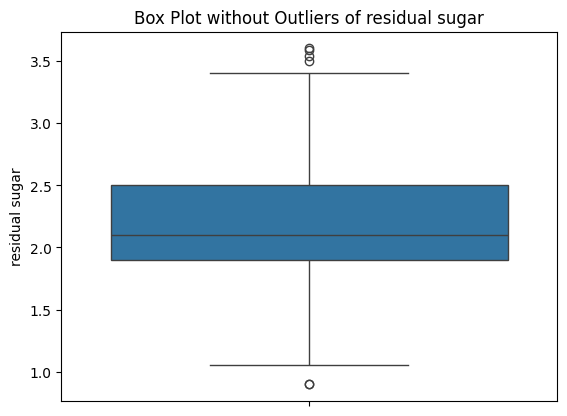

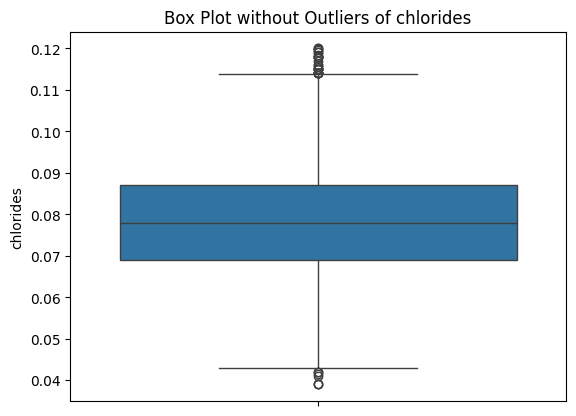

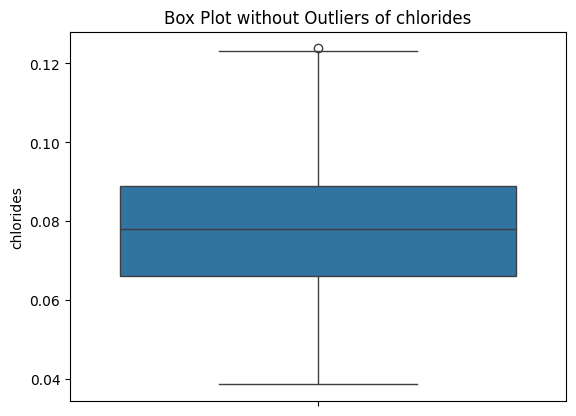

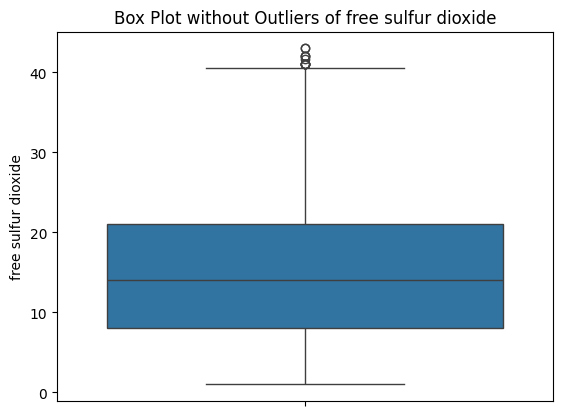

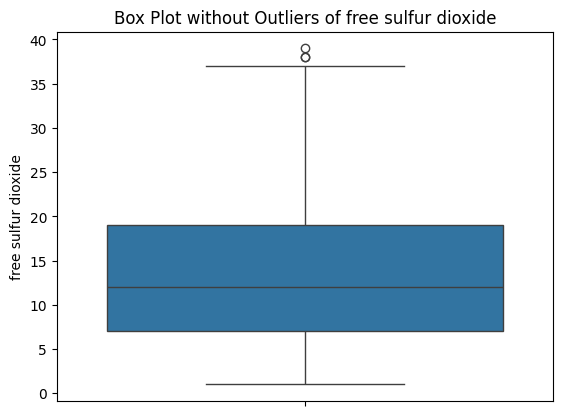

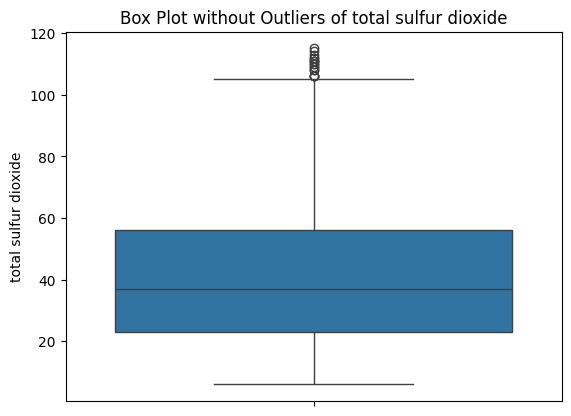

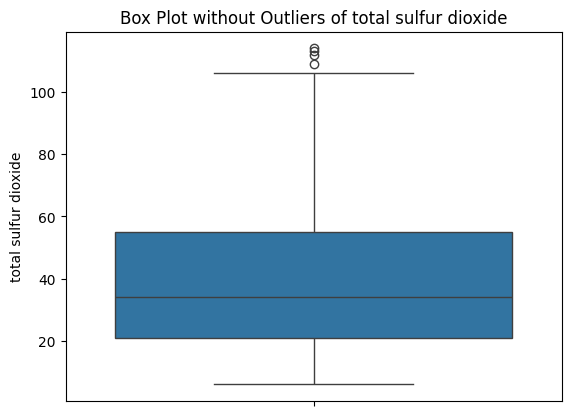

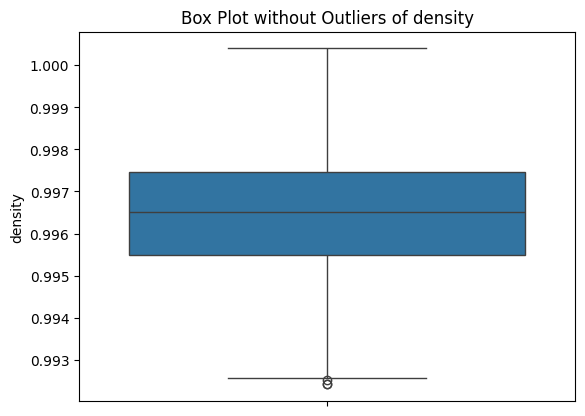

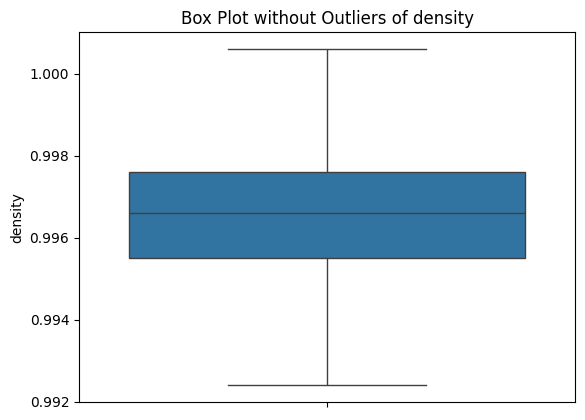

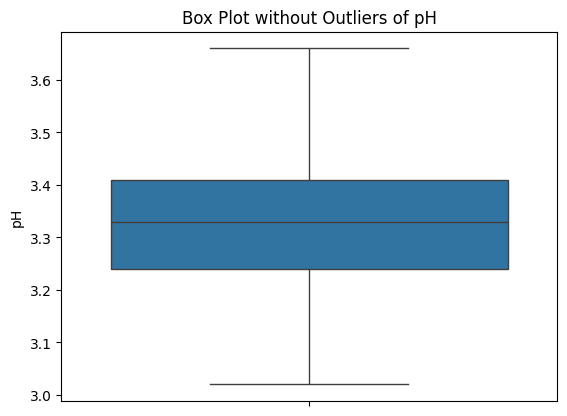

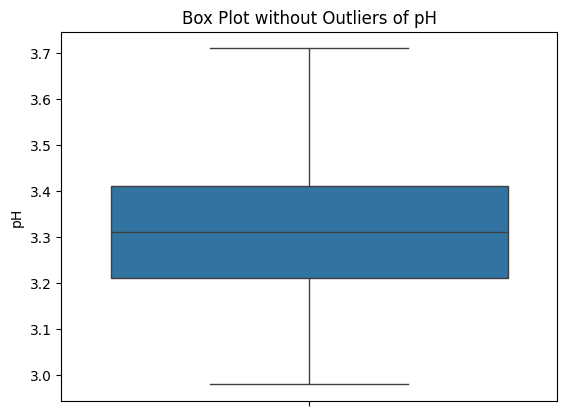

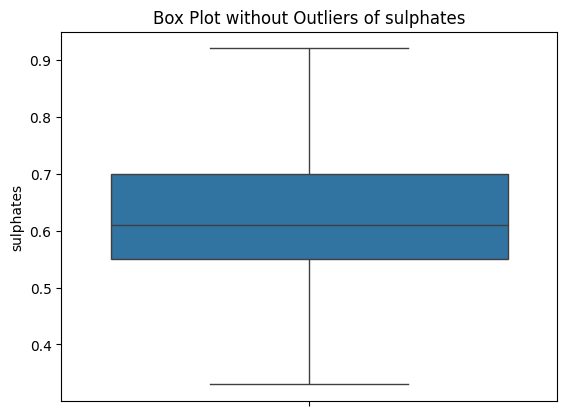

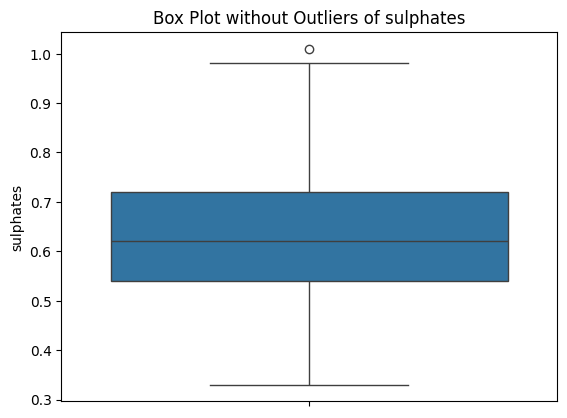

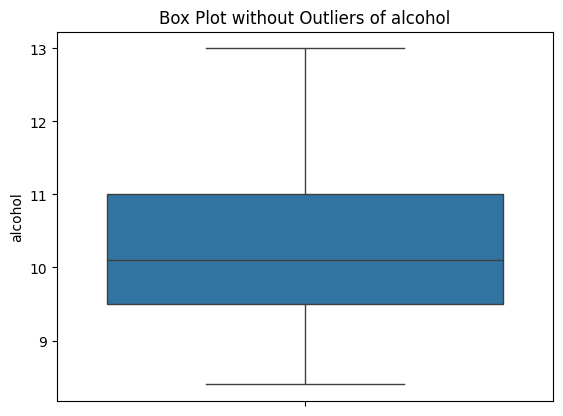

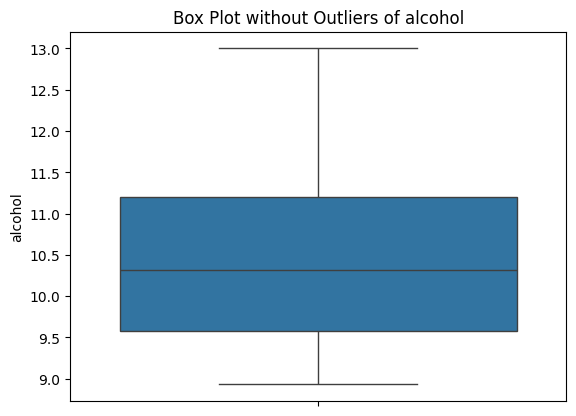

In [ ]:
# fixed acidity ucun train və test
X_train = removal_box_plot(X_train, 'fixed acidity')
X_test = removal_box_plot(X_test, 'fixed acidity')

# butun sutunlar ucun
for col in X_train.columns:
    X_train = removal_box_plot(X_train, col)
    X_test = removal_box_plot(X_test, col)

In [ ]:
print("After outlier removal:")
print("X_train:", X_train.shape)
print("X_test :", X_test.shape)

After outlier removal:
X_train: (942, 11)
X_test : (260, 11)


# FeatureScaling (normalization,standardization) (Abalfaz)

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [ ]:
minmax_scaler = MinMaxScaler()

X_train_norm = minmax_scaler.fit_transform(X_train)
X_test_norm = minmax_scaler.transform(X_test)

print("Normalized X_train shape:", X_train_norm.shape)
print("Normalized X_test shape:", X_test_norm.shape)

Normalized X_train shape: (942, 11)
Normalized X_test shape: (260, 11)


In [ ]:
pd.DataFrame(X_train_norm, columns=X_train.columns).head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.802961,0.325843,0.735874,0.851852,0.456790,0.500000,0.440367,0.899749,0.203125,0.949153,0.326087
1,0.324439,0.348315,0.401386,0.407407,0.567901,0.119048,0.302752,0.130326,0.484375,0.220339,0.760870
2,0.590084,0.206513,0.603386,0.510410,0.294623,0.615422,0.158699,0.209078,0.079361,0.730291,0.143146
3,0.211845,0.359551,0.521801,0.592593,0.469136,0.119048,0.073394,0.392231,0.765625,0.610169,0.565217
4,0.422958,0.179775,0.401386,0.407407,0.283951,0.404762,0.256881,0.348371,0.406250,0.966102,0.630435


In [ ]:
standard_scaler = StandardScaler()

X_train_std = standard_scaler.fit_transform(X_train)
X_test_std = standard_scaler.transform(X_test)

print("Standardized X_train shape:", X_train_std.shape)
print("Standardized X_test shape:", X_test_std.shape)

Standardized X_train shape: (942, 11)
Standardized X_test shape: (260, 11)


In [ ]:
pd.DataFrame(X_train_std, columns=X_train.columns).head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,1.779344,-0.684722,1.769676,2.218217,-0.170436,0.757392,0.483020,2.052861,-1.438296,2.386399,-0.466077
1,-0.812188,-0.564194,0.343991,-0.383210,0.443329,-1.050661,-0.113566,-2.008063,0.001929,-1.494249,1.622215
2,0.626468,-1.324747,1.204975,0.219685,-1.066231,1.305200,-0.738065,-1.592418,-2.072069,1.221047,-1.344756
3,-1.421960,-0.503930,0.857238,0.700718,-0.102240,-1.050661,-1.107876,-0.625761,1.442154,0.581446,0.682484
4,-0.278637,-1.468154,0.343991,-0.383210,-1.125182,0.305378,-0.312428,-0.857247,-0.398134,2.476646,0.995727


# Categorial encoding(OHE) (Vusala)

In [ ]:
df.head()
df.shape

(1459, 12)

In [ ]:
df.dtypes

,0
fixed acidity,float64
volatile acidity,float64
citric acid,float64
residual sugar,float64
chlorides,float64
free sulfur dioxide,float64
total sulfur dioxide,float64
density,float64
pH,float64
sulphates,float64


In [ ]:
categorical_cols = df.select_dtypes(include=["object"]).columns
categorical_cols

Index([], dtype='object')

# Linear Regression and Train Data (Sona)




In [111]:
class LinearRegression:
    def __init__(self, learning_rate=0.01, iterations=1000):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.W = None
        self.b = None
        self.costs = []

    def fit(self, X, y):
        m, n = X.shape
        self.W = np.zeros(n)
        self.b = 0
        self.costs = []

        for i in range(self.iterations):
            y_pred = X.dot(self.W) + self.b

            # Gradients
            dW = - (2 / m) * X.T.dot(y - y_pred)
            db = - (2 / m) * np.sum(y - y_pred)

            # Update weights and bias
            self.W -= self.learning_rate * dW
            self.b -= self.learning_rate * db

            # Cost
            self.costs.append(np.mean((y - y_pred)**2))

        return self

    def plot_loss(self):
        import matplotlib.pyplot as plt
        plt.plot(self.costs)
        plt.title("Linear Regression Training Loss")
        plt.xlabel("Iterations")
        plt.ylabel("MSE")
        plt.show()


In [112]:
# Outlier removal sonrası target-i X_train-ə uyğunlaşdır
y_train = y_train[X_train.index]
y_test = y_test[X_test.index]

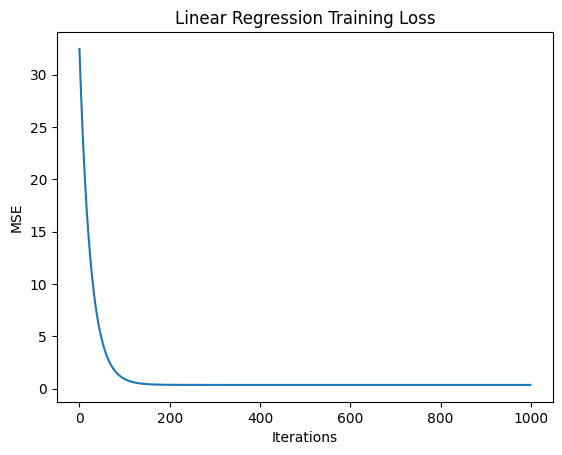

Learned Weights: [ 0.05549428 -0.13576994 -0.04601192  0.02054518  0.00435056  0.02325715
 -0.04027531 -0.07322349 -0.06238832  0.22315231  0.25999741]
Learned Bias: 5.645638902124172


In [110]:
lin_model = LinearRegression(learning_rate=0.01, iterations=1000)
lin_model.fit(X_train_std, y_train)  # artıq işləyəcək
lin_model.plot_loss()

print("Learned Weights:", lin_model.W)
print("Learned Bias:", lin_model.b)

# Logistic Regression and Train Model (Vusala)

In [103]:
df['quality_binary'] = (df['quality'] >= 6).astype(int)


In [104]:
# Features və target
X = df.drop(['quality', 'quality_binary'], axis=1)
y = df['quality_binary']

In [105]:
X_train_b = np.c_[np.ones((X_train_std.shape[0], 1)), X_train_std]
X_test_b = np.c_[np.ones((X_test_std.shape[0], 1)), X_test_std]

y_train_array = (y_train_clean >= 6).astype(int).values
y_test_array = (y_test_clean >= 6).astype(int).values

In [106]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


def compute_cost(X, y, beta):
    m = len(y)
    h = sigmoid(X @ beta)
    epsilon = 1e-15
    h = np.clip(h, epsilon, 1 - epsilon)

    cost = -1/m * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
    return cost


def gradient_descent(X, y, beta, learning_rate, num_iterations):
    """Gradient descent optimization"""
    m = len(y)
    cost_history = []

    for i in range(num_iterations):
        h = sigmoid(X @ beta)

        gradient = 1/m * X.T @ (h - y)

        beta = beta - learning_rate * gradient

        cost = compute_cost(X, y, beta)
        cost_history.append(cost)

        if i % 100 == 0:
            print(f"Iteration {i}: Cost = {cost:.4f}")

    return beta, cost_history


def predict(X, beta, threshold=0.5):
    probabilities = sigmoid(X @ beta)
    predictions = (probabilities >= threshold).astype(int)
    return predictions, probabilities


In [109]:
# Parametrləri initialize edirik
np.random.seed(42)
beta_initial = np.random.randn(X_train_b.shape[1]) * 0.01

# Hyperparameters
learning_rate = 0.1
num_iterations = 1000

# Training
beta_optimal, cost_history = gradient_descent(
    X_train_b,
    y_train_clean.values,
    beta_initial,
    learning_rate,
    num_iterations
)
y_test_pred, y_test_prob = predict(X_test_b, beta_optimal)


print("TRAINING is done!")

print(f"Intercept (beta_0): {beta_optimal[0]:.4f}")
print(f"Coefficients (beta_1 ... beta_n):")
for i, col in enumerate(X_train.columns):
    print(f"  {col}: {beta_optimal[i+1]:.4f}")

Iteration 0: Cost = -1.9866
Iteration 100: Cost = -159.9963
Iteration 200: Cost = -160.4584
Iteration 300: Cost = -160.4584
Iteration 400: Cost = -160.4584
Iteration 500: Cost = -160.4584
Iteration 600: Cost = -160.4584
Iteration 700: Cost = -160.4584
Iteration 800: Cost = -160.4584
Iteration 900: Cost = -160.4584
TRAINING is done!
Intercept (beta_0): 464.7388
Coefficients (beta_1 ... beta_n):
  fixed acidity: 9.5626
  volatile acidity: -28.0391
  citric acid: 17.3383
  residual sugar: 3.1701
  chlorides: -12.0050
  free sulfur dioxide: 0.2131
  total sulfur dioxide: -13.2124
  density: -17.6039
  pH: -5.8073
  sulphates: 33.3218
  alcohol: 38.1519


In [108]:
y_test_pred, y_test_prob = predict(X_test_b, beta_optimal)